# Question 1

The theoretical Simple Linear Regression model is a model that illustrates the relationship between two types of variables called the predictor (or independent variables -> the "x" values) and the outcome variables (or dependent variables -> the "y" values). It uses the follows this equation:

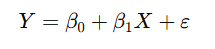

Where Y is the outcome variable or the dependent variable.
Where X is the predictor variable or the independent variable.
Where Beta0 is the y-intercept of the equation or what the Y value is expected to be at X = 0 (including the error term)
Where Beta1 is the slope of the equation or what the Y value is expected to be for a change in X 
Where e is the error term in the equation or the difference between the observed and predicted Y value.

We say that combined they create a sample from a normal distribution because of the error term and how it works with the beta0 + beta1*X terms. Since the error term is calculated from a normal distribution, for every X value we calculate a value based of the beta0 and beta1 values each Y value has some variability. If we were to take a normal distribution of Y at that particular X value we would see our Y as a sample point from that distribution because of the error term, hence leading it to be a sample from a normal distribution.

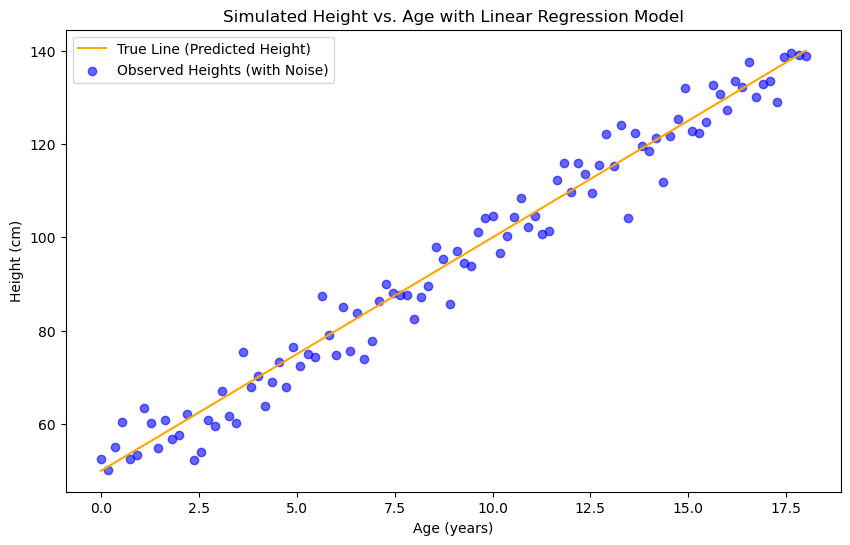

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for our "theoretical" model
intercept = 50  # Expected height for a newborn, in cm
slope = 5       # Expected growth in cm per year of age
error_std = 5   # Standard deviation of the error term, in cm

# Generate age data (predictor variable) for a group of children
ages = np.linspace(0, 18, 100)  # Ages from 0 to 18 years

# Calculate the "true" heights without noise
true_heights = intercept + slope * ages

# Simulate observed heights by adding random noise (normally distributed errors)
observed_heights = true_heights + norm.rvs(0, error_std, size=ages.size)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(ages, true_heights, label="True Line (Predicted Height)", color="orange")
plt.scatter(ages, observed_heights, color="blue", alpha=0.6, label="Observed Heights (with Noise)")
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Simulated Height vs. Age with Linear Regression Model")
plt.legend()
plt.show()

# Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3364.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.14e-77
Time:                        03:32:48   Log-Likelihood:                -292.60
No. Observations:                 100   AIC:                             589.2
Df Residuals:                      98   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.1359      0.905     54.289      0.0

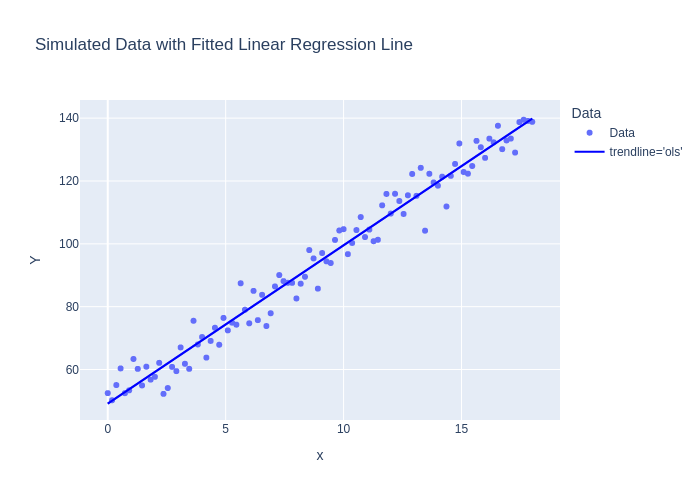

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for creating and fitting statistical models
import plotly.express as px  # for interactive plotting

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for the "true" line
intercept = 50  # hypothetical intercept
slope = 5       # hypothetical slope
error_std = 5   # standard deviation of the error term

# Simulate predictor variable 'x' and outcome variable 'Y' with noise
x = np.linspace(0, 18, 100)
true_y = intercept + slope * x
Y = true_y + np.random.normal(0, error_std, size=x.size)

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fitting the regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Define the model
fitted_model = model_data_specification.fit()  # Fit the model to the data

# Model output
print(fitted_model.summary())  # Full summary of the fitted model
print(fitted_model.params)  # Coefficients of the fitted model
print(fitted_model.rsquared)  # R-squared value of the fitted model

# Visualization
# Add a 'Data' column to specify data in the legend
df['Data'] = 'Data'  # Helps differentiate the data points in the legend

# Create scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols',
                 title='Simulated Data with Fitted Linear Regression Line')

# Manually add the trendline using fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer='png')

# Question 3

Appended Code:

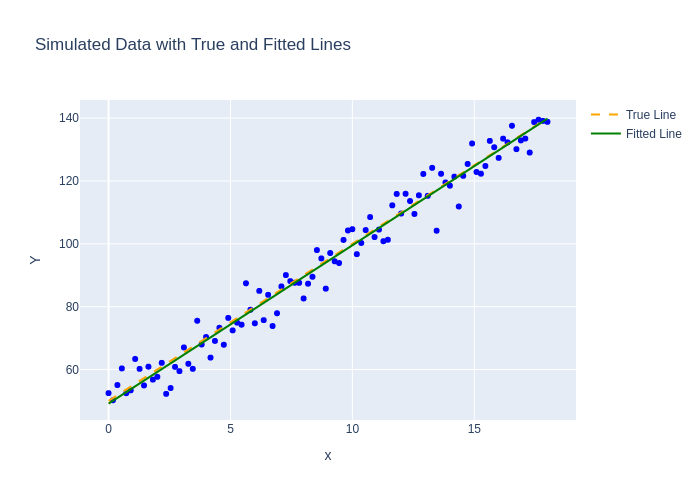

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# True model parameters
intercept = 50
slope = 5
error_std = 5

# Simulate data
x = np.linspace(0, 18, 100)
true_y = intercept + slope * x  # True line without noise
Y = true_y + np.random.normal(0, error_std, size=x.size)  # Simulated observed values with noise

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the regression model to the simulated data
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Plotting
fig = px.scatter(df, x='x', y='Y', color_discrete_sequence=['blue'], title='Simulated Data with True and Fitted Lines')

# Add true line
fig.add_trace(go.Scatter(x=x, y=true_y, mode='lines', name='True Line', line=dict(color='orange', dash='dash')))

# Add fitted line
fig.add_trace(go.Scatter(x=x, y=fitted_model.fittedvalues, mode='lines', name='Fitted Line', line=dict(color='green')))

fig.show(renderer='png')

**Difference:**
The yellow dashed line or the "True Line" is the actual relationship between our x-value and y-value in our simulated data set. This means that if I were to open the imaginary/theoritical csv file that stores the data for this line, I would find that for each x-value a specific y-value. When we created the scatter plot however, we sampled with a random sampling variation, given by our error term. This would hypothetically give us what our data set would have looked like if we had sampled from the "real world" and from which we fitted a line (the green line) that shows the linear relationship **between the simulated y-values and the x-values** hence leading to its difference from the true line.

# Question 4

In [4]:
print(fitted_model.fittedvalues)
print(fitted_model.params)

0      49.135936
1      50.051993
2      50.968050
3      51.884107
4      52.800165
         ...    
95    136.161370
96    137.077427
97    137.993485
98    138.909542
99    139.825599
Length: 100, dtype: float64
Intercept    49.135936
x             5.038315
dtype: float64


After simulating our values and applying the library to create a fitted model, we calculate the slope (beta1) and the intercept (beta0) to get our fitted equation, y = beta0 + beta1*x, the fittedvalues are value greated for each corresponding x value giving us the points which the line approximates and runs its line through.

# Question 5

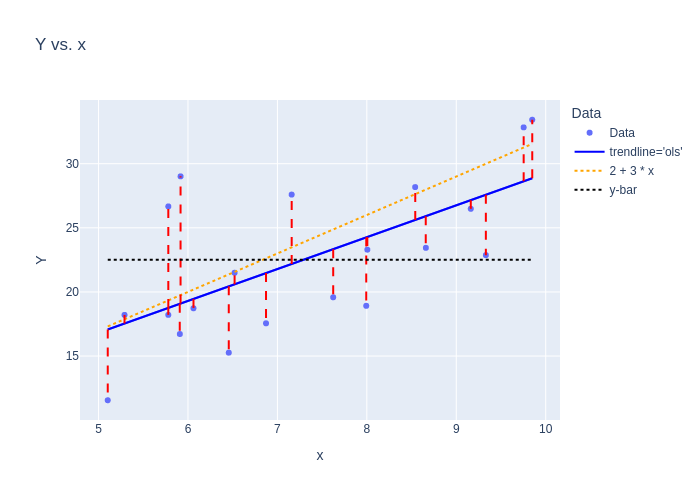

In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Define parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5

np.random.seed(42)

# Generate predictor values
x = stats.uniform(x_min, x_range).rvs(size=n)

# Generate errors
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)

# Generate outcome variable Y based on the true model
Y = beta0 + beta1 * x + errors

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the regression model to the simulated data
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add a 'Data' column to label the points in the legend
df['Data'] = 'Data'

# Plot scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually add fitted trendline
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# True line (without error) based on beta0 and beta1
x_range_vals = np.array([df['x'].min(), df['x'].max()])
y_true_line = beta0 + beta1 * x_range_vals
fig.add_scatter(x=x_range_vals, y=y_true_line, mode='lines',
                name=f'{beta0} + {beta1} * x', line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'].iloc[i], df['x'].iloc[i]],
                    y=[fitted_model.fittedvalues.iloc[i], df['Y'].iloc[i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add horizontal line at the mean of Y
fig.add_scatter(x=x_range_vals, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer='png')

The blue line is the fitted line based off the observed data using the oridnary least squares method. This line is best fitted as it minimizes the distances between all the points hence leading to the use of squares as distance between 2 points is calculated using an equation that involves squaring.

# Question 6

When we calculate R^2, we calculate it as seen below as the subtraction between 1 and a fraction. The fraction denominator represents the total variation possible, meaning we find the mean of the Y values and we calculate the spread for each point from the mean. The numerator calculates the unexplained variation, since we calculate the difference between what our model fits for each y value compared to the actual y value, we will get some points which don't allign perfectly, this difference or the residual between them is unexplainable as "by chance" our model could not properly fit a line through this point to properly minimize the residual without affecting other reisduals. When we divide the 2 we get the proportion of unexplainable variation, of which when we take 1 and subtract from it this value, we get the proportion of explainable variation.

$R^2 = 1 - \frac{\sum{i=1}^n(Y_i-\hat y)^2}{\sum_{i=1}^n(Y_i-\bar Y)^2}$

# Question 7

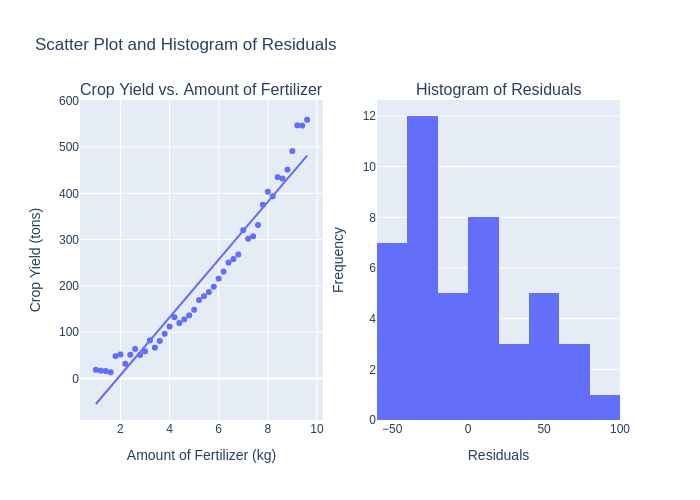

In [6]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png')

One of the main assumptions of linear regression model, is that it "follows" a linear relationship. This means that if the data followed a non linear curve, our regression model would not work properly. We would still be able to fit a line, but it would be meaningless as it would not be able to capture an "accurate" relationship between the predictor and outcome variables.

Chatgpt Logs for Q1-Q7: https://chatgpt.com/share/67254505-9a1c-8007-abce-61f6ac48fc2c

# Week of Nov 04

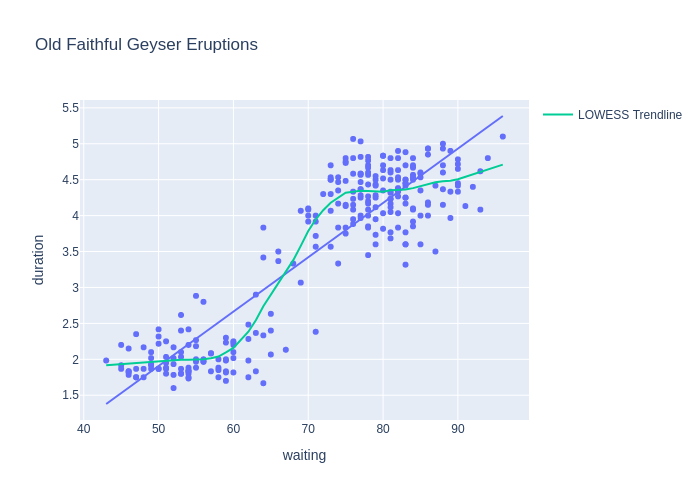

In [7]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 8

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:32:50   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0:$ On average, there is no linear relationship between duration of a geyser eruoption and its waiting time or in other terms, $\beta_1 = 0$.

The main reason for this null hypothesis is the R^2 value, as it illustrates that our model can only explain 81.1% of the variation, leading to almost 20% of the variation being unexplainable.

# Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


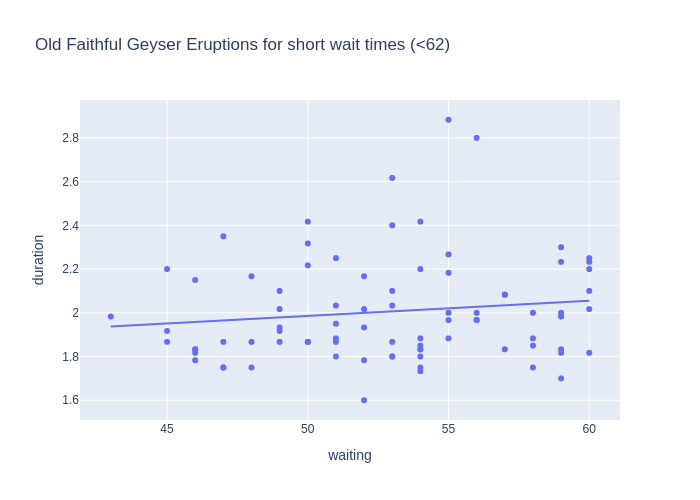

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Is there evidence in the data set for a relationship between duration and wait time, similar to the main data set? (Characterization):**
I believe that there is some evidence in the data set that illustrates the relationship from the original data set. We can see that although the values are varied in terms of duration, being numerous above and below the fitted line, the general trend seems to be that the longer you wait, the longer the duration of the eruption, a trend also seen in the original data set. This insight allows us to characterize the evidence against the null hypothesis, that being that indeed there is a relationship between the duration waited and the duration of the geyser.

# Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


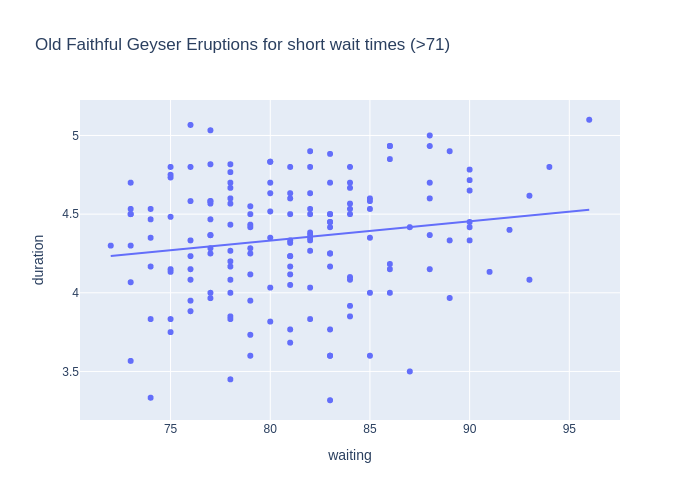

In [10]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.

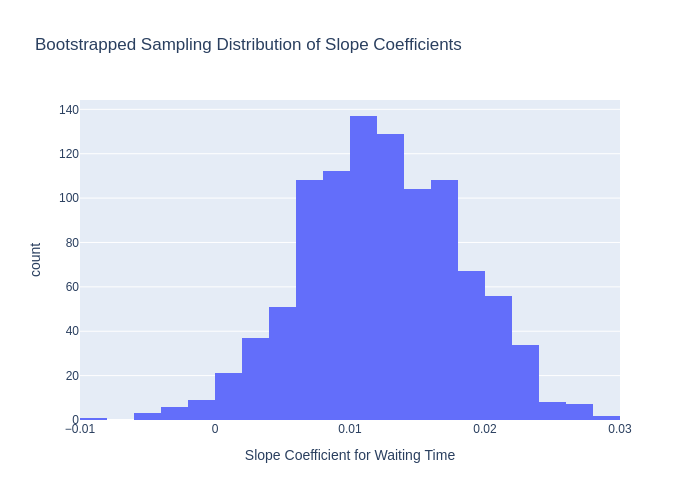

In [11]:
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
import pandas as pd

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the waiting time limit for the subset of interest
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
filtered_data = old_faithful[long_wait]

# Number of bootstrap samples
n_bootstrap = 1000
slopes = []

# Perform bootstrap sampling and fit linear regression models
for _ in range(n_bootstrap):
    # Sample with replacement
    sample = filtered_data.sample(frac=1, replace=True)
    
    # Fit the linear regression model on the sample
    model = smf.ols('duration ~ waiting', data=sample).fit()
    
    # Append the slope coefficient (for 'waiting')
    slopes.append(model.params['waiting'])

# Create a DataFrame with the slopes for visualization
slope_df = pd.DataFrame(slopes, columns=['slope'])

# Plot the distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   labels={'slope': 'Slope Coefficient for Waiting Time'})
fig.show(renderer='png')

2./3.

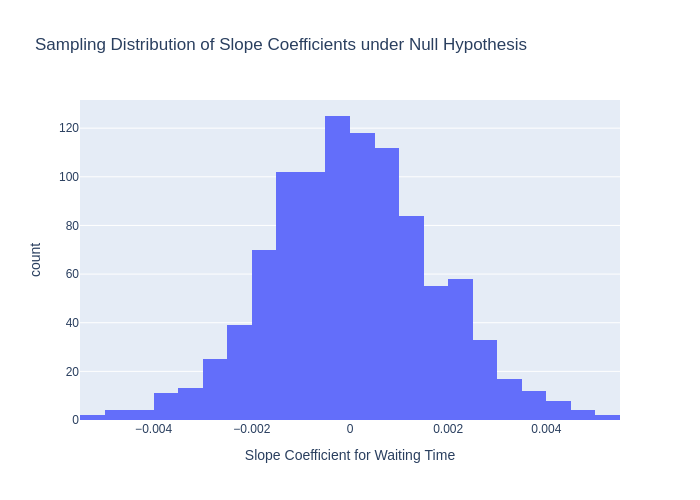

95% Confidence Interval for the Slope Coefficient: (-0.0033, 0.0035)


In [12]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for the true underlying model
n_samples = 160
n_simulations = 1000
beta_0 = 1.65
beta_1 = 0  # Null hypothesis: no linear association
std_dev = 0.37

# Container for storing slope coefficients from each simulation
slopes = []

# Perform simulations
for _ in range(n_simulations):
    # Simulate `waiting` values from a uniform distribution within a plausible range
    waiting = np.random.uniform(40, 100, n_samples)
    
    # Generate `duration` based on the null hypothesis model
    duration = beta_0 + beta_1 * waiting + np.random.normal(0, std_dev, n_samples)
    
    # Fit a linear regression model to the simulated data
    sim_data = pd.DataFrame({'waiting': waiting, 'duration': duration})
    model = smf.ols('duration ~ waiting', data=sim_data).fit()
    
    # Store the slope (coefficient for `waiting`)
    slopes.append(model.params['waiting'])

# Convert slopes to a DataFrame for analysis and visualization
slope_df = pd.DataFrame(slopes, columns=['slope'])

# Plot the distribution of the slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Sampling Distribution of Slope Coefficients under Null Hypothesis",
                   labels={'slope': 'Slope Coefficient for Waiting Time'})
fig.show(renderer='png')

# Calculate the 95% confidence interval for the slope coefficients
lower_bound, upper_bound = np.percentile(slopes, [2.5, 97.5])
print(f"95% Confidence Interval for the Slope Coefficient: ({lower_bound:.4f}, {upper_bound:.4f})")


Yes, 0 is in the confidence interval, meaning we cannot reject the null hypothesis.

# Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


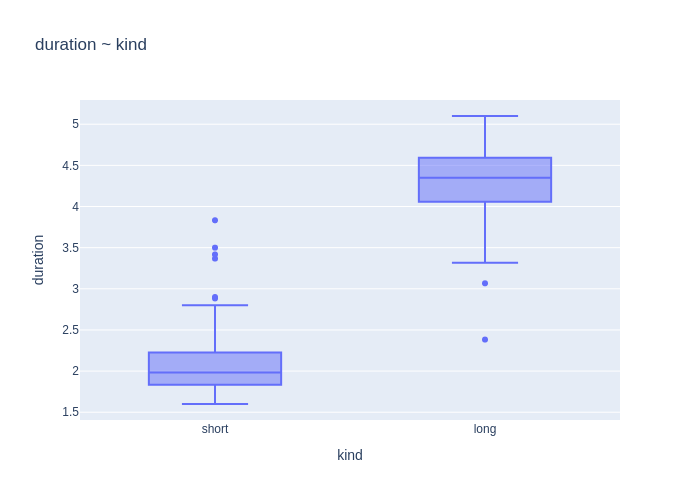

In [13]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

#display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary())

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

We can characterize the relationship between short and long waiting times and their duration through understanding what the [T.long] coefficient means. This coefficient is equal to the difference between the mean, and a positive coefficient means that there exists a difference between the duration waiting and the duration of the gyser erruption. However, the p-value for this coefficient/value is 0 or close to 0, meaning that there is very, very strong evidence against the null hypothesis assumption of their being on average no association between duration waited and eruption length.a

# Question 12

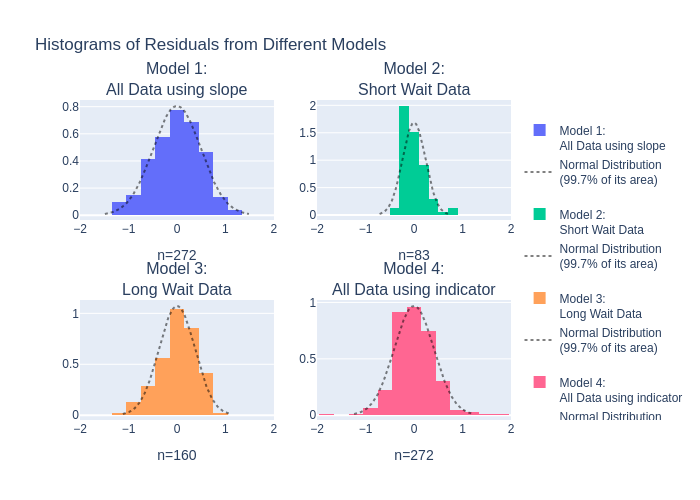

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

I believe that model 1 best supports the assumption that error term is normally distributed as it best follows a normal distribution. Although the other 3 all have a similar distribution, a significant portion of their data falls out of the curve imposed on the histogram, signifying that a normal distribution cannot fully capture the residual spread properly implying that a linear regression model is not suited for portraying the relationship between duration waited and eruption time.

# Question 13

In [16]:
import numpy as np
import seaborn as sns

# Load dataset and define the 'short' and 'long' wait groups
old_faithful = sns.load_dataset('geyser').dropna()  # Drop any missing values
short_wait = old_faithful['kind'] == 'short'
long_wait = old_faithful['kind'] == 'long'

# Observed difference in means between "long" and "short" wait groups
observed_diff = old_faithful.loc[long_wait, 'duration'].mean() - old_faithful.loc[short_wait, 'duration'].mean()

# Set up permutation test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

# Run the permutations
for i in range(n_permutations):
    shuffled_kind = np.random.permutation(old_faithful['kind'])
    perm_diff = old_faithful.loc[shuffled_kind == 'long', 'duration'].mean() - \
                old_faithful.loc[shuffled_kind == 'short', 'duration'].mean()
    perm_diffs[i] = perm_diff

# Calculate the 95% confidence interval based on the permutation distribution
lower_bound = np.percentile(perm_diffs, 2.5)
upper_bound = np.percentile(perm_diffs, 97.5)
confidence_interval = (lower_bound, upper_bound)

# Output results
print(f"Observed Difference in Means: {observed_diff}")
print(f"95% Confidence Interval for the Difference in Means: {confidence_interval}")

Observed Difference in Means: 2.2036002325581396
95% Confidence Interval for the Difference in Means: (-0.2815435813953484, 0.2767020232558135)


They work in a similar way because of their main objective of comparing two different groups by analyzing the difference in the aveage. The main difference is the indicator variable relies on a specific model, for example an linear regression model meaning we expect the data to follow a linear relationship, while a permutation test does not take this into consideration, removing the ambiguity of what if the data did not follow this linear relationship.

Chatgpt Logs for Q8-Q13: https://chatgpt.com/share/672d884f-1dd8-8007-bd35-c08b4dc66386

# Question 14

Yes.